In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_production.csv')

In [3]:
df.head()

,state_name,district_name,crop_year,season,crop,area,production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.shape

(246091, 7)

In [5]:
df.describe()

,crop_year,area,production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   state_name     246091 non-null  object 
 1   district_name  246091 non-null  object 
 2   crop_year      246091 non-null  int64  
 3   season         246091 non-null  object 
 4   crop           246091 non-null  object 
 5   area           246091 non-null  float64
 6   production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [8]:
df.nunique()

state_name          33
district_name      646
crop_year           19
season               6
crop               124
area             38442
production       51627
dtype: int64

In [9]:
df.isnull().sum()

state_name          0
district_name       0
crop_year           0
season              0
crop                0
area                0
production       3730
dtype: int64

In [10]:
df = df.fillna(df['production'].mean())

In [11]:
df.isnull().sum()

state_name       0
district_name    0
crop_year        0
season           0
crop             0
area             0
production       0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(246091, 7)

Text(0.5, 1.0, 'crop_year vs production')

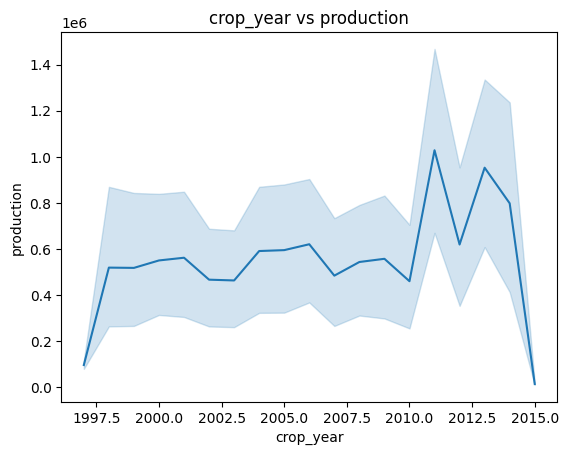

In [65]:
sns.lineplot(data=df,x='crop_year',y='production')
plt.title('crop_year vs production')

Text(0.5, 1.0, 'crop_year vs area')

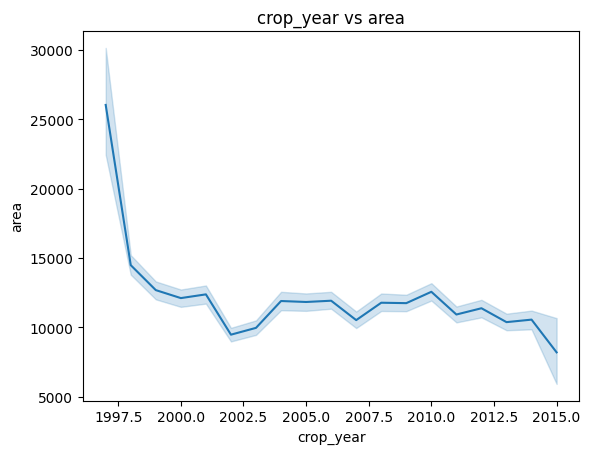

In [64]:
sns.lineplot(data=df,x='crop_year',y='area')
plt.title('crop_year vs area')

Text(0.5, 1.0, 'season vs production')

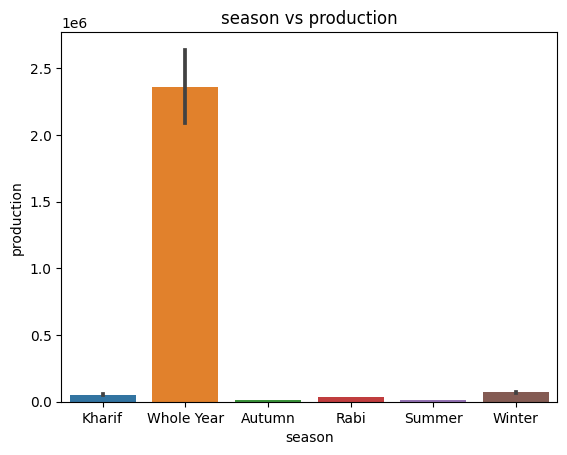

In [63]:
sns.barplot(data=df,x='season',y='production')
plt.title('season vs production')

<Axes: xlabel='season', ylabel='area'>

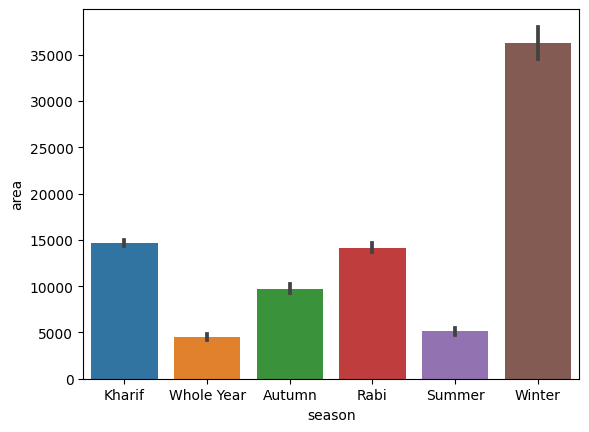

In [24]:
sns.barplot(data=df,x='season',y='area')

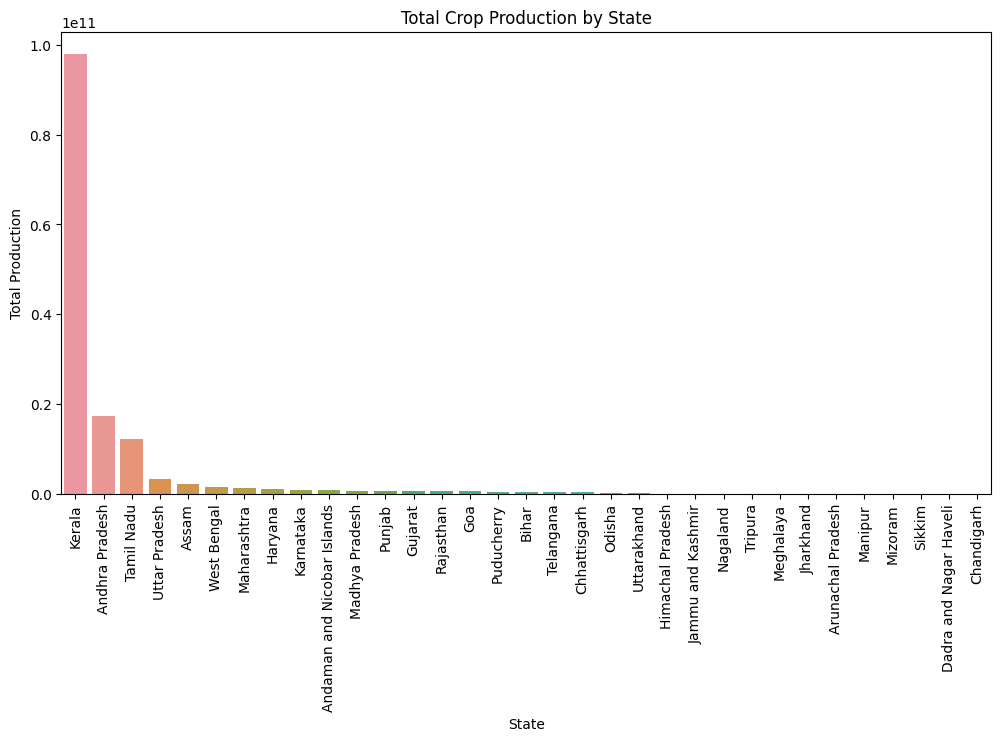

In [44]:
# Group the data by state_name and calculate the total production per state
df_state_grouped = df.groupby('state_name')['production'].sum().reset_index()

# Sort the data by total production in descending order
df_state_grouped = df_state_grouped.sort_values('production', ascending=False)

# Bar plot of total production by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state_name', y='production', data=df_state_grouped)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Production')
plt.title('Total Crop Production by State')
plt.show()


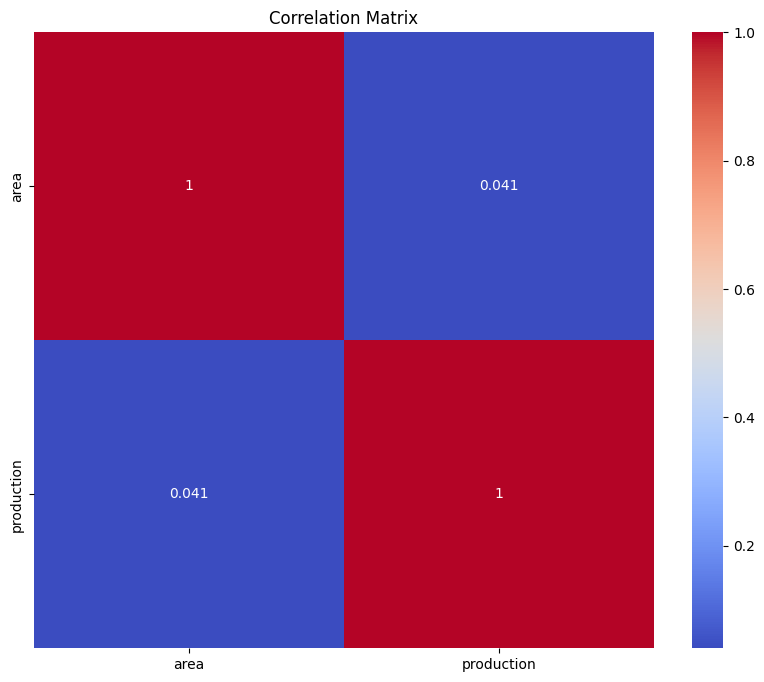

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['area', 'production']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<Figure size 1200x800 with 0 Axes>

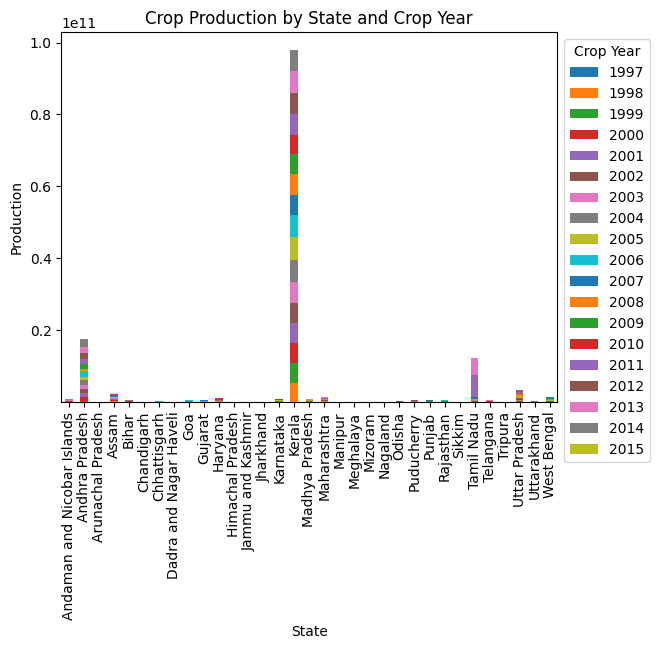

In [46]:
plt.figure(figsize=(12, 8))
df_state_crop_year = df.groupby(['state_name', 'crop_year'])['production'].sum().unstack()
df_state_crop_year.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State and Crop Year')
plt.legend(title='Crop Year', bbox_to_anchor=(1, 1))
plt.show()


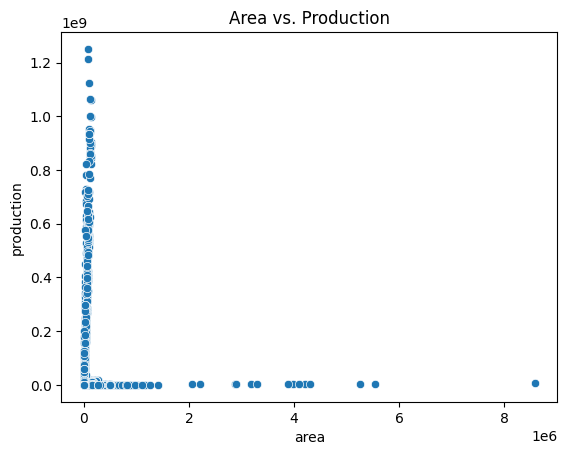

In [48]:
sns.scatterplot(x='area', y='production', data=df)
plt.title('Area vs. Production')
plt.show()


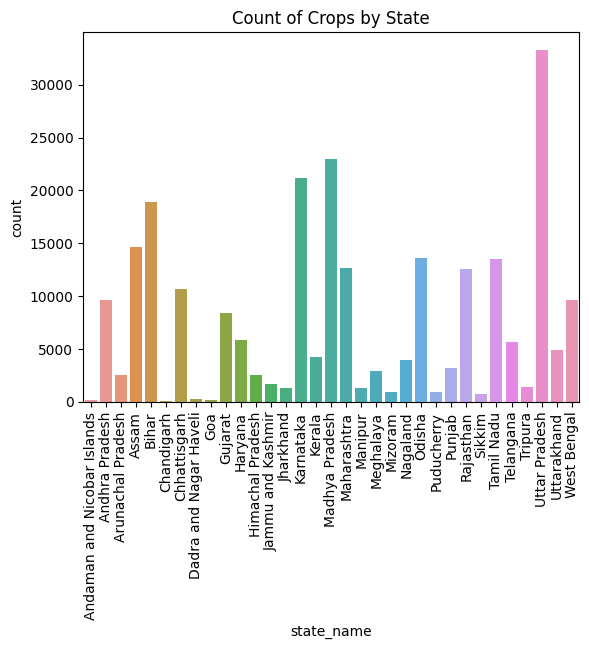

In [49]:
sns.countplot(x='state_name', data=df)
plt.xticks(rotation=90)
plt.title('Count of Crops by State')
plt.show()

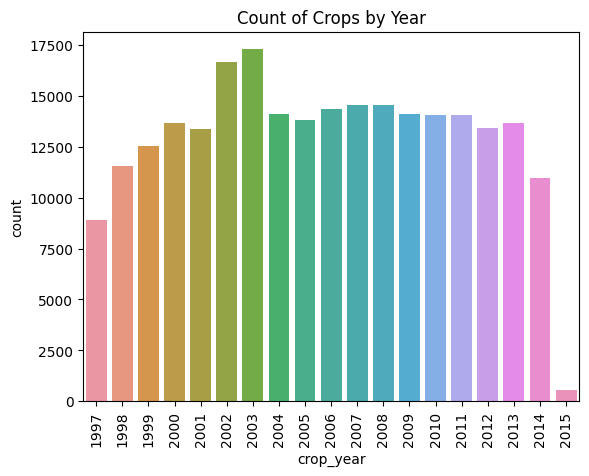

In [50]:
sns.countplot(x='crop_year', data=df)
plt.xticks(rotation=90)
plt.title('Count of Crops by Year')
plt.show()

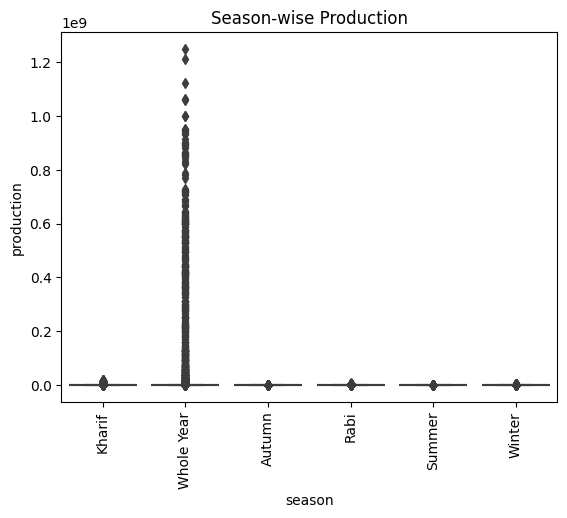

In [51]:
sns.boxplot(x='season', y='production', data=df)
plt.xticks(rotation=90)
plt.title('Season-wise Production')
plt.show()

<Figure size 1200x800 with 0 Axes>

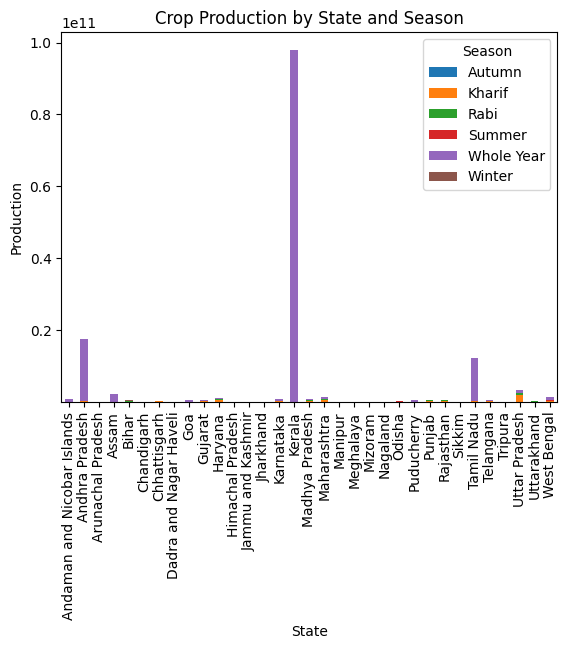

In [58]:
df_state_season_grouped = df.groupby(['state_name', 'season'])['production'].sum().unstack()

plt.figure(figsize=(12, 8))
df_state_season_grouped.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State and Season')
plt.legend(title='Season', bbox_to_anchor=(1, 1))
plt.show()



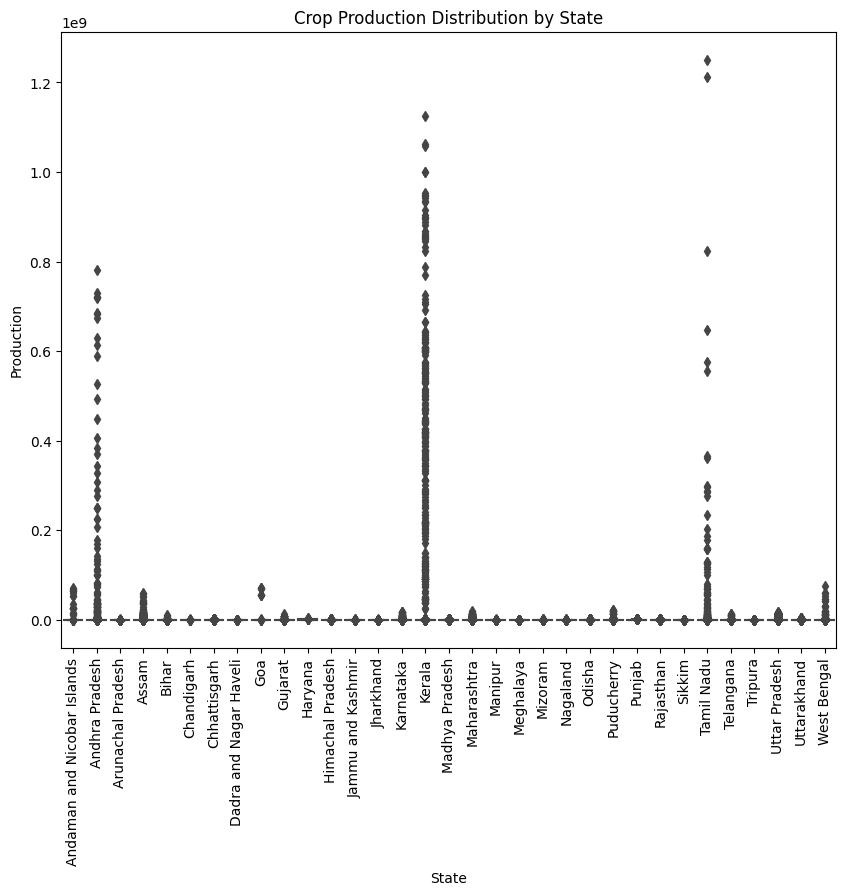

In [59]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='state_name', y='production', data=df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production Distribution by State')
plt.show()


<Figure size 1200x800 with 0 Axes>

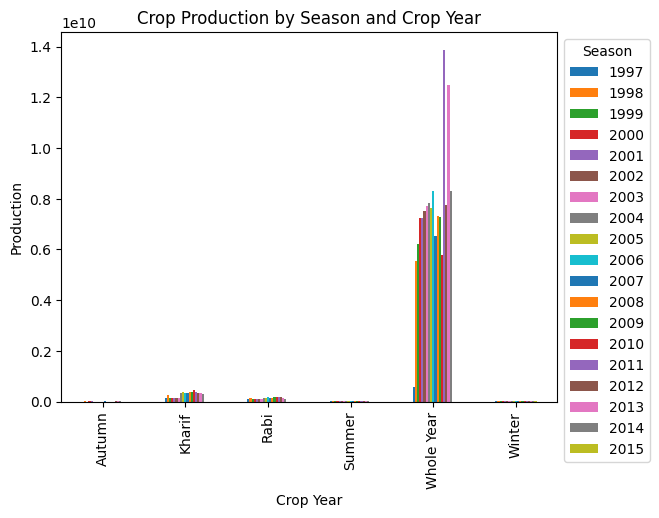

In [60]:
df_season_year_grouped = df.groupby(['season', 'crop_year'])['production'].sum().unstack()

plt.figure(figsize=(12, 8))
df_season_year_grouped.plot(kind='bar')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.title('Crop Production by Season and Crop Year')
plt.legend(title='Season', bbox_to_anchor=(1, 1))
plt.show()


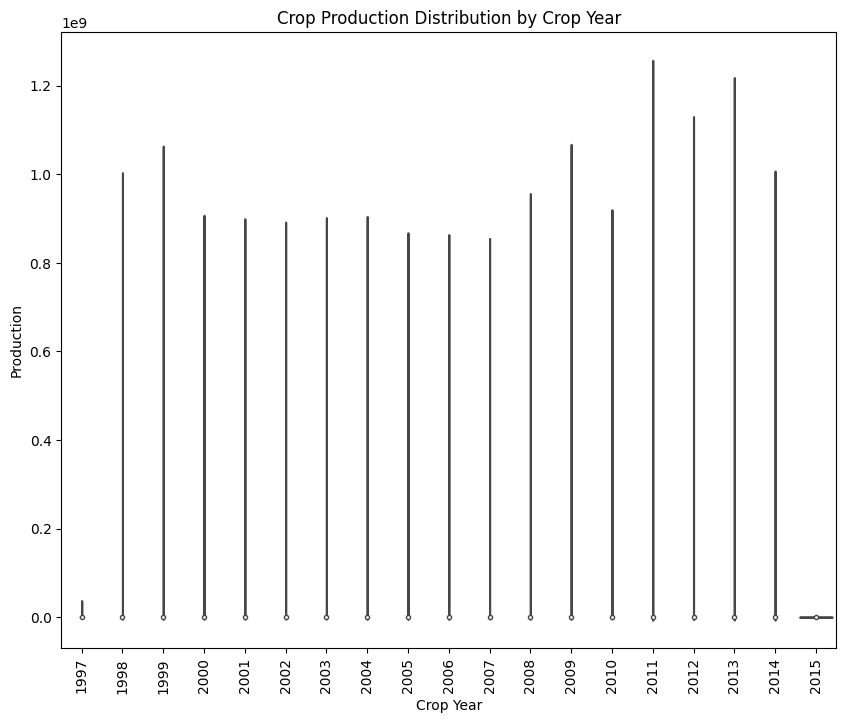

In [61]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='crop_year', y='production', data=df)
plt.xticks(rotation=90)
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.title('Crop Production Distribution by Crop Year')
plt.show()
